In [1]:
import warnings
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score

pd.set_option('precision', 20)
warnings.simplefilter('ignore')

In [2]:
dt = pd.read_csv('./bags.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55220060585879537918,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0


In [3]:
data = normalize(dt.values, norm = 'l2')

Time in Minutes: 166.62214358647665


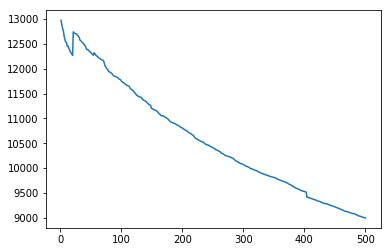

In [4]:
highest_k = 500
init = 'k-means++' # k-means++ / random

start = time.time()

clusters = []

for k in range(highest_k):

    current_k = k + 1
    
    kmeans = KMeans(n_clusters = current_k,
                    n_init = 1,
                    max_iter = 1,
                    init = init,
                    algorithm = 'auto',
                    precompute_distances = 'auto',
                    random_state = 0,
                    verbose = False)
    
    kmeans.fit(data)
    
    loss = kmeans.inertia_
    
    clusters.append([current_k, loss])

clusters = np.array(clusters)

plt.plot(clusters[:, 0], clusters[:, 1])

finish = time.time()

print("Time in Minutes: " + str((finish - start) / 60))